In [296]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [297]:
# Load the data into pandas dataframe and see its attributes
df_raw = pd.read_csv("../res/preprocessed_dataset4.csv")
print("Number of rows in data =",df_raw.shape[0])
print("Number of columns in data =",df_raw.shape[1])
df_raw.head()

Number of rows in data = 149823
Number of columns in data = 7


,tweet_text,Homophobe,NotHate,OtherHate,Racist,Religion,Sexist
0,@FriskDontMiss Nigga https://t.co/cAsaLWEpue,1,0,0,1,1,0
1,My horses are retarded https://t.co/HYhqc6d5WN,0,0,1,0,0,0
2,“NIGGA ON MA MOMMA YOUNGBOY BE SPITTING REAL S...,0,1,0,0,0,0
3,RT xxSuGVNGxx: I ran into this HOLY NIGGA TODA...,0,1,0,1,0,0
4,“EVERYbody calling you Nigger now!” https://t....,0,1,0,1,0,0


In [298]:
# Drop tweet_text column
df_raw.drop(columns=['tweet_text'], inplace=True)
df_raw.head()

,Homophobe,NotHate,OtherHate,Racist,Religion,Sexist
0,1,0,0,1,1,0
1,0,0,1,0,0,0
2,0,1,0,0,0,0
3,0,1,0,1,0,0
4,0,1,0,1,0,0


C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


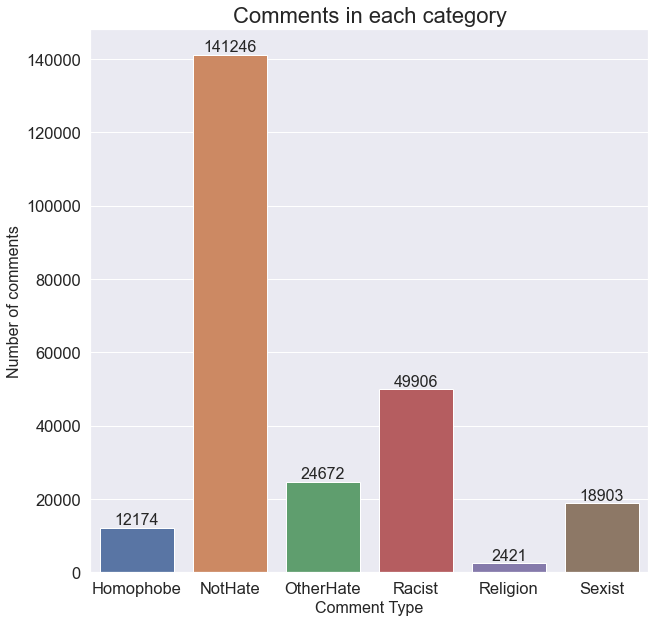

In [299]:
# Now we count the number of comments under each label.
categories = list(df_raw.columns.values)
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))

ax= sns.barplot(categories, df_raw.iloc[:,:].sum().values)
plt.title("Comments in each category", fontsize=22)
plt.ylabel('Number of comments', fontsize=16)
plt.xlabel('Comment Type', fontsize=16)
# #adding the text labels
rects = ax.patches
labels = df_raw.iloc[:,:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height, label, ha='center', va='bottom', fontsize=16)
plt.show()

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


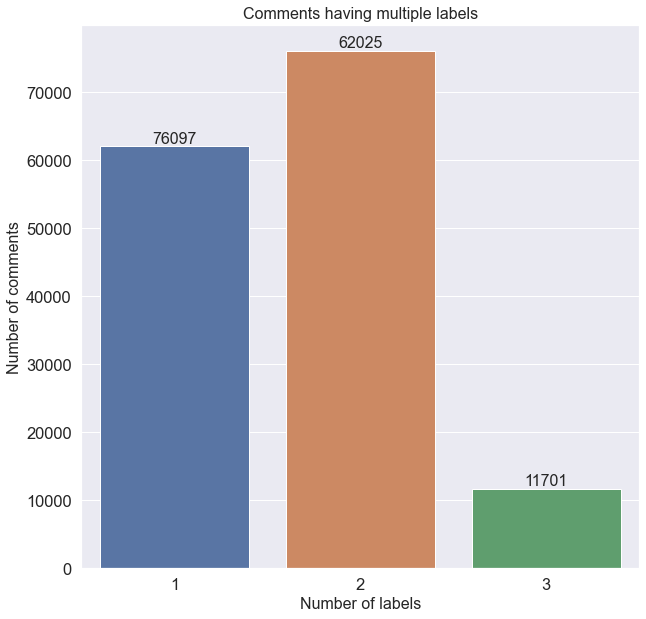

In [300]:
# TODO: Determine why 62025 has higher graph compared to 76097

# Counting the number of comments having multiple labels.
rowSums = df_raw.iloc[:,:].sum(axis=1)
multiLabel_counts = rowSums.value_counts()
multiLabel_counts = multiLabel_counts.iloc[:]
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))
ax = sns.barplot(multiLabel_counts.index, multiLabel_counts.values)
plt.title("Comments having multiple labels", fontsize=16)
plt.ylabel('Number of comments', fontsize=16)
plt.xlabel('Number of labels', fontsize=16)
#adding the text labels
rects = ax.patches
labels = multiLabel_counts.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=16)
plt.show()